In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('E:\\SkillFactory\\datatone\\SolarPrediction.csv')
df.sample(10)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
7898,1477849518,10/30/2016 12:00:00 AM,07:45:18,136.08,48,30.45,102,163.21,7.87,06:23:00,17:49:00
30401,1481496665,12/11/2016 12:00:00 AM,12:51:05,187.84,53,30.39,100,320.24,12.37,06:47:00,17:44:00
17030,1480244718,11/27/2016 12:00:00 AM,01:05:18,1.19,45,30.46,99,121.37,11.25,06:38:00,17:42:00
15783,1475454623,10/2/2016 12:00:00 AM,14:30:23,340.57,56,30.41,97,33.42,13.50,06:14:00,18:10:00
27092,1482492342,12/23/2016 12:00:00 AM,01:25:42,1.24,48,30.44,27,142.68,12.37,06:54:00,17:50:00
14711,1475783722,10/6/2016 12:00:00 AM,09:55:22,443.59,58,30.49,87,0.38,2.25,06:15:00,18:07:00
9059,1477500617,10/26/2016 12:00:00 AM,06:50:17,16.97,48,30.42,28,188.14,6.75,06:21:00,17:52:00
644,1475033120,9/27/2016 12:00:00 AM,17:25:20,55.97,57,30.37,85,41.78,1.12,06:13:00,18:15:00
15111,1475660420,10/4/2016 12:00:00 AM,23:40:20,1.23,50,30.46,100,161.82,4.50,06:14:00,18:08:00
1669,1474714826,9/24/2016 12:00:00 AM,01:00:26,1.24,52,30.47,97,184.74,4.50,06:12:00,18:17:00


In [3]:
df['month'] = pd.to_datetime(df['Data']).dt.month
df['day'] = pd.to_datetime(df['Data']).dt.day

df['hour'] = pd.to_datetime(df['Time']).dt.hour
#df['minute'] = pd.to_datetime(df['Time']).dt.minute
#df['second'] = pd.to_datetime(df['Time']).dt.second

df['rise_hour'] = pd.to_datetime(df['TimeSunRise']).dt.hour
#df['rise_minute'] = pd.to_datetime(df['TimeSunRise']).dt.minute

df['set_hour'] = pd.to_datetime(df['TimeSunSet']).dt.hour
#df['set_minute'] = pd.to_datetime(df['TimeSunSet']).dt.minute

df.drop(['UNIXTime', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis = 1, inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_8136\3650499516.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['month'] = pd.to_datetime(df['Data']).dt.month
C:\Users\User\AppData\Local\Temp\ipykernel_8136\3650499516.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['day'] = pd.to_datetime(df['Data']).dt.day
C:\Users\User\AppData\Local\Temp\ipykernel_8136\3650499516.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['Time']).dt.hour
C:\Users\User\AppData\Local\Temp\ipykernel_8136\3650499516.py:8: UserWarning: Could not infer format, s

### Создаю отдельные признаки: месяц,день,время наблюдения,время восхода и заката 

In [5]:
df.sample(5)

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,day,hour,rise_hour,set_hour
5964,158.75,47,30.40,58,166.44,6.75,9,1,7,6,18
26129,538.15,53,30.49,59,136.74,19.12,12,1,9,6,17
30474,3.18,45,30.40,98,176.62,3.37,12,0,6,6,17
2578,1.24,50,30.41,101,161.93,2.25,9,0,20,6,18
29783,285.41,50,30.28,96,292.09,9.00,12,1,16,6,17


In [6]:
def get_day(row):
    if row['rise_hour'] < row['hour'] < row['set_hour']:
        return 1
    else:
        return 0
df['day'] = df.apply(get_day, axis=1) # создание нового признака, когда время наблюдения в период с восхода до захода солнца

### Создаю признак день (1), ночь (0)

In [7]:
df.sample(5)

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,day,hour,rise_hour,set_hour
2103,1048.33,70,30.42,37,136.29,13.50,9,1,12,6,18
31719,93.73,45,30.37,93,190.64,6.75,12,1,8,6,17
8400,1139.83,51,30.38,98,21.56,4.50,10,1,13,6,17
4066,52.02,56,30.41,98,0.49,10.12,9,1,16,6,18
21584,1.22,46,30.46,51,176.86,7.87,11,0,5,6,17


In [19]:
df_day = df[df['day']==1]
df_day.shape

(14022, 11)

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

import pickle

#### далее оставляю признаки,используемые в модели для предсказания: 'Radiation', 'Temperature', 'Pressure', 'hour', 'Humidity', 'WindDirection(Degrees)', 'Speed' и сохраняю в таблицу df1

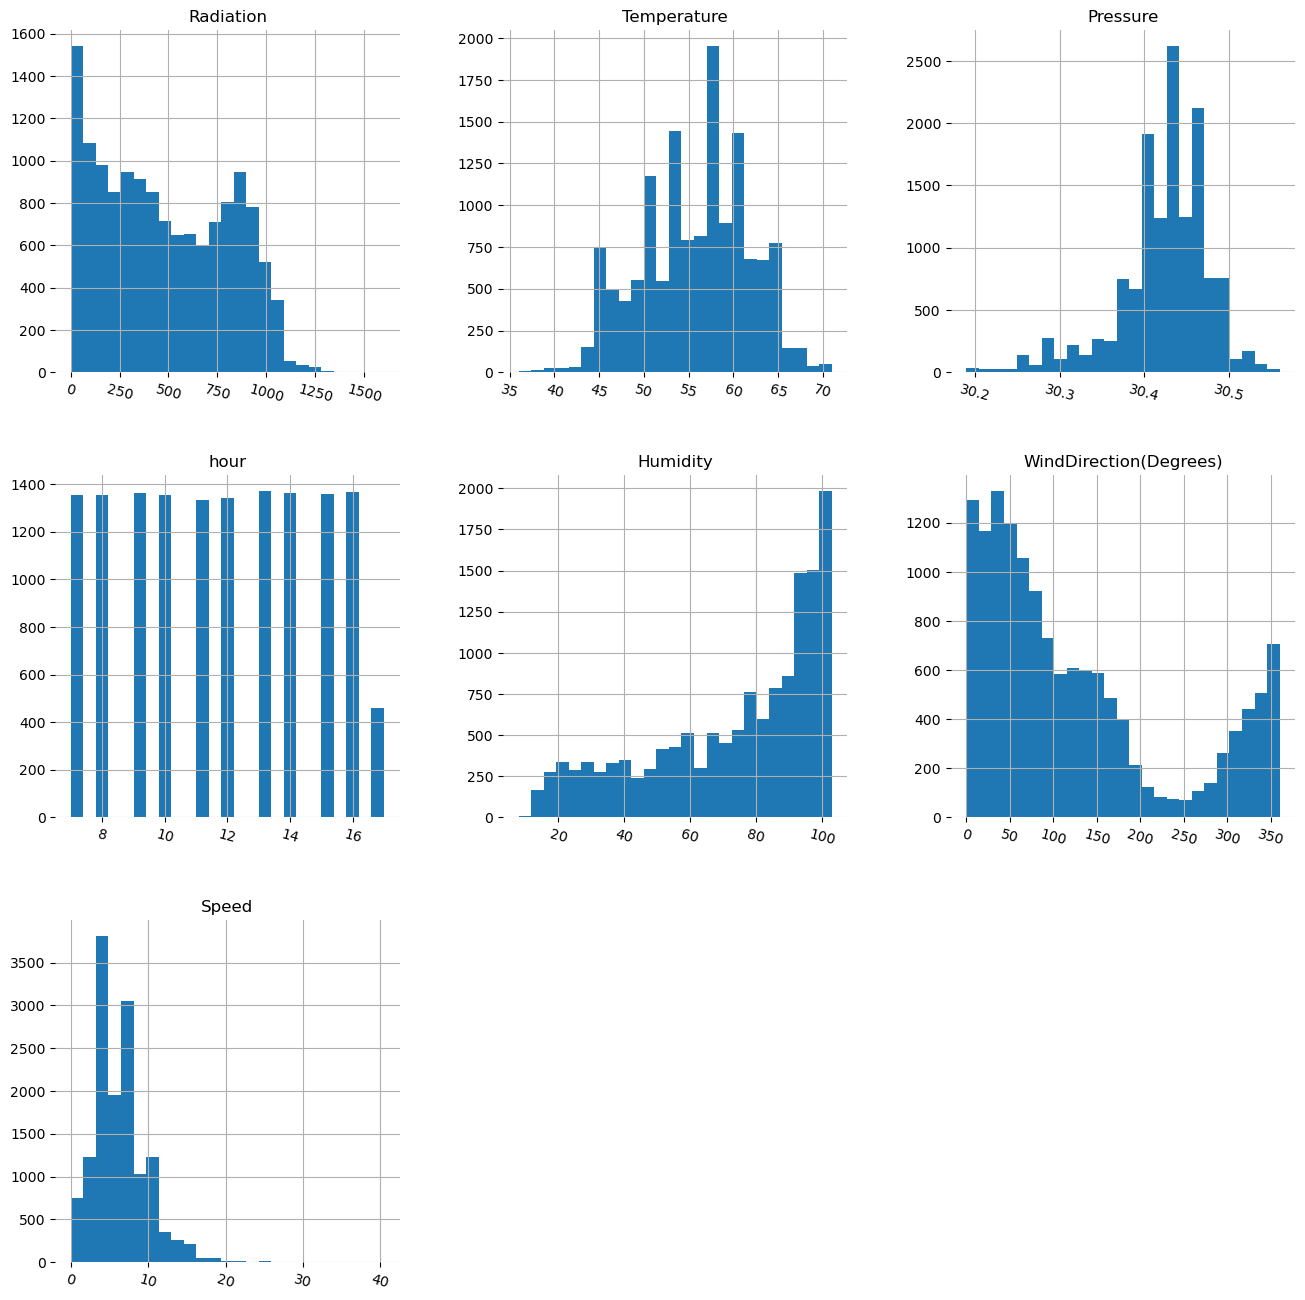

In [10]:
df1=df_day[['Radiation', 'Temperature', 'Pressure', 'hour', 
       'Humidity', 'WindDirection(Degrees)', 'Speed']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

#### Признак Radiation выровнялся после удаления ночных наблюдений, но по своему виду подходит под график логарифма. В дальнейшем мы планируем остроить модель, предсказывающую солнечную радиацию, поэтому будем использовать только дневные наблюдения

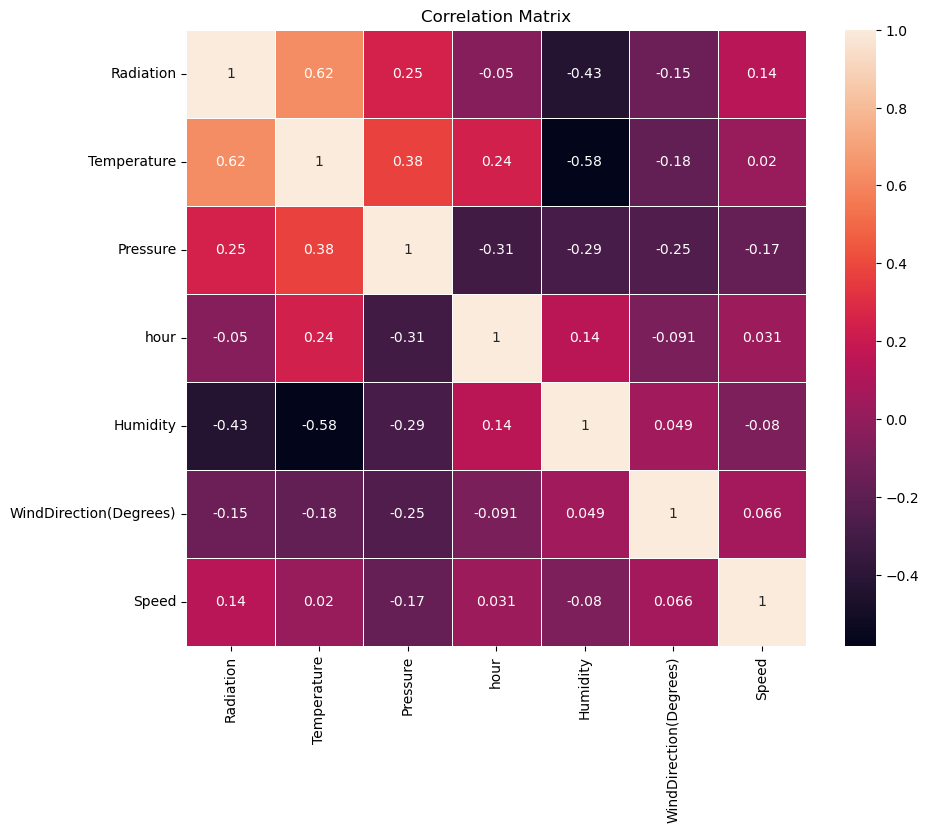

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


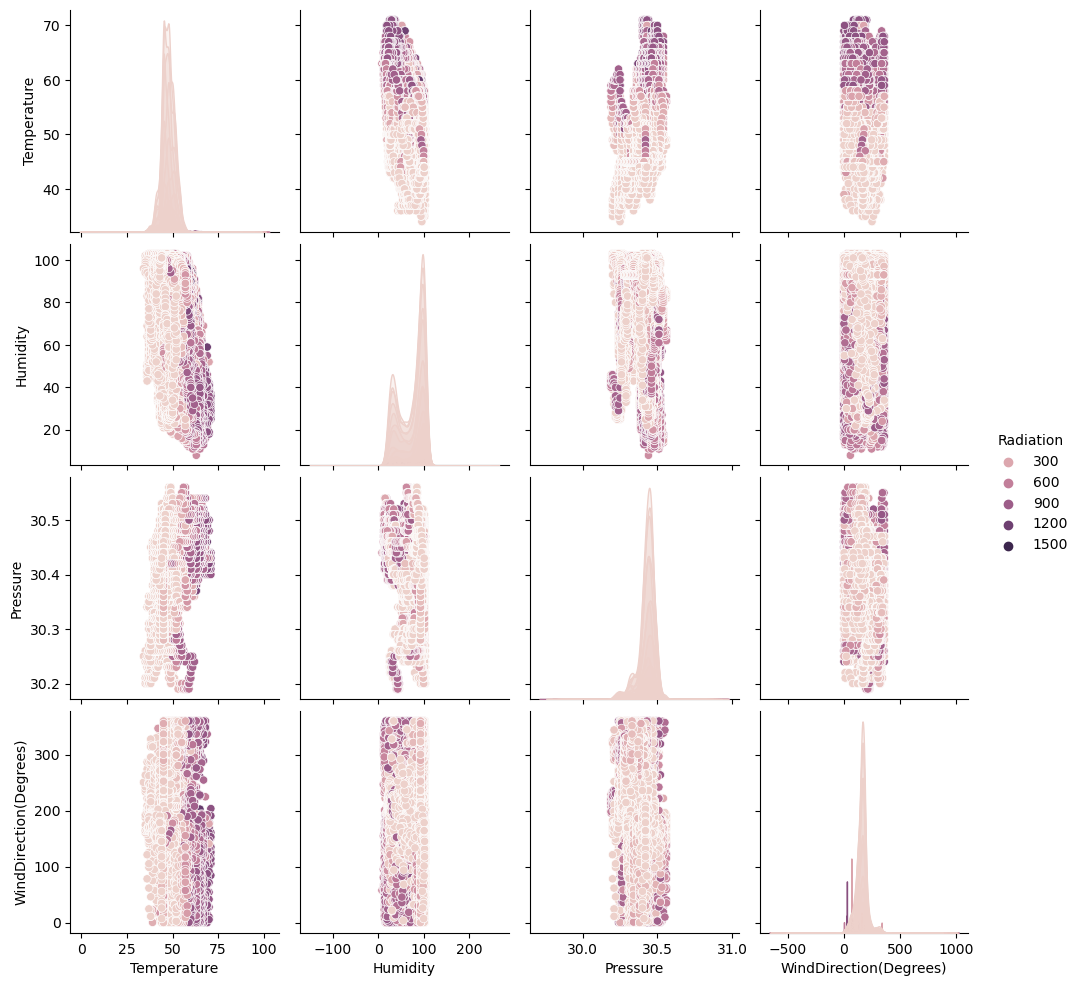

In [9]:
df_pair = df1[['Temperature', 'Humidity', 'Pressure', 'WindDirection(Degrees)', 'Radiation']]
sns.pairplot(df_pair, hue='Radiation');

In [22]:
y = df1['Radiation']
y_log = np.log(df1['Radiation']) # Логарифмирую признак солнечная радиация

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x400 with 0 Axes>

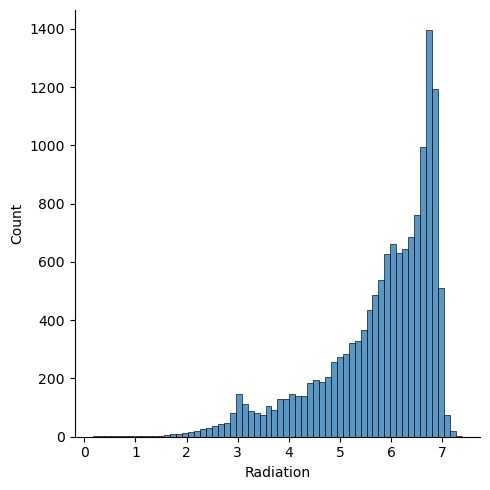

In [24]:
fig= plt.figure(figsize=(15, 4))
sns.displot(y_log);

In [28]:
X = df1[['Temperature', 'Pressure','Humidity', 'WindDirection(Degrees)', 'Speed', 'hour']]
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [29]:
sts = StandardScaler()
X_train = sts.fit_transform(X_train)
X_test = sts.transform(X_test)

In [30]:
from catboost import CatBoostRegressor
cbr = CatBoostRegressor(silent=True)
params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'subsample': [1.0],
    'colsample_bylevel': [1.0],
    'reg_lambda': [3.0]
}
grid_search = GridSearchCV(estimator=cbr, param_grid=params, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_cbr = grid_search.best_estimator_
y_pred = best_cbr.predict(X_test)
CatBoostRegressor_best_params = grid_search.best_params_
print("CatBoostRegressor_best_params: ", CatBoostRegressor_best_params)
CatBoostRegressor_mse = mean_squared_error(y_test, y_pred)
print("CatBoostRegressor_mse: ", CatBoostRegressor_mse)

CatBoostRegressor_best_params:  {'colsample_bylevel': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'reg_lambda': 3.0, 'subsample': 1.0}
CatBoostRegressor_mse:  0.2281258860404589


In [13]:
# with open('best_cbr.pkl', 'wb') as model_file:# Сохранение модели в файл с использованием pickle
#     pickle.dump(best_cbr, model_file)

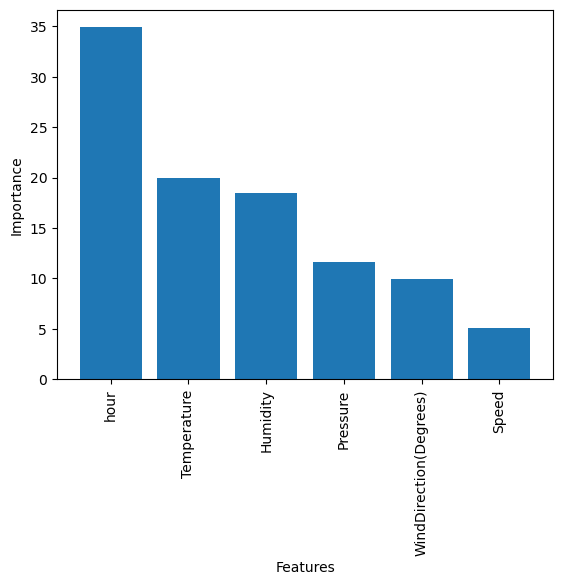

In [31]:
feature_imp = best_cbr.feature_importances_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_imp))
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
features, importances = zip(*sorted_feature_importances)

plt.bar(features, importances)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [11]:
def predict_solrad_cbr(data):
    data = sts.transform(data)
    predict = best_cbr.predict(data)
    return np.exp(predict)

In [12]:
def get_predict_solrad(): # predict solar ratiation watts per meter^2 by model CatBoostRegressor
    Temperature = float(input('Temperature: '))
    Pressure = float(input('Pressure: '))
    Humidity = float(input('Humidity: '))
    WindDirection = float(input('WindDirection: '))
    Speed = float(input('Speed: '))
    hour = float(input('hour: '))
    data_list = [[Temperature, Pressure, Humidity, WindDirection, Speed, hour]]
    data_arg = pd.DataFrame(data_list, columns=['Temperature', 'Pressure','Humidity', 'WindDirection(Degrees)', 'Speed', 'hour'])
    print('solar ratiation watts per meter^2: ', predict_solrad_cbr(data_arg))
print(get_predict_solrad())

Temperature: 54
Pressure: 30.42
Humidity: 101
WindDirection: 350.99
Speed: 6.75
hour: 15
solar ratiation watts per meter^2:  [161.25406328]
None
